In [1]:
import os
import pandas as pd

#Le o csv de monossacarídeos
mon_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/SIC/monossaccharides.csv', names=['comp_id', 'entry_id', 'oligossaccharide', 'entity_id', 'comp_num', 'mol_num', 'name'])


In [18]:
import os
import pandas as pd

#Le o csv de monossacarídeos
mon_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/monossaccharides_iupac.csv')


In [19]:
print(len(mon_df['entry_id'].unique()))

15602


In [20]:
mon_df['iupac_name'] = mon_df['iupac_name'].str.replace(r'^(a-|b-)', '', regex=True)

In [21]:
#cria df dizendo quantas entradas do pdb contém cada carboidrato
comp_ids = []
in_n_entries = []
names = []

for comp_id in mon_df['iupac_name'].unique():
    comp_ids.append(comp_id)
    in_n_entries.append(len(mon_df['entry_id'].loc[mon_df['iupac_name'] == comp_id].unique()))
    names.append(mon_df['name'].loc[mon_df['iupac_name'] == comp_id].unique())


frequence_df = pd.DataFrame(data = {'comp_id': comp_ids, 'in_n_entries': in_n_entries, 'name': names})

In [33]:
#Others

# Ordenar o DataFrame 'mon_df' pela coluna 'in_n_entries' de forma decrescente
frequence_df_sorted = frequence_df.sort_values(by='in_n_entries', ascending=False)

novePrimeiros = frequence_df_sorted['in_n_entries'].head(9).sum()

others = frequence_df_sorted['in_n_entries'].sum() - novePrimeiros
print(others)

print(frequence_df_sorted['in_n_entries'].sum())
print(frequence_df['in_n_entries'].sum())

2933
23720
23720


In [3]:
#cria df dizendo quantas entradas do pdb contém cada carboidrato
comp_ids = []
in_n_entries = []
names = []

for comp_id in mon_df['comp_id'].unique():
    comp_ids.append(comp_id)
    in_n_entries.append(len(mon_df['entry_id'].loc[mon_df['comp_id'] == comp_id].unique()))
    names.append(mon_df['name'].loc[mon_df['comp_id'] == comp_id].unique())


frequence_df = pd.DataFrame(data = {'comp_id': comp_ids, 'in_n_entries': in_n_entries, 'name': names})

In [4]:
#Soma todos os carboidratos
result = mon_df.groupby(['comp_id', 'name'])['mol_num'].sum().reset_index()

# Calculando a porcentagem
total_count = result['mol_num'].sum()
result['percentage'] = (result['mol_num'] / total_count) * 100

In [7]:
#Percentual de "Others"
print(((result['mol_num'].sum() - 104557)/result['mol_num'].sum()) * 100)

14.869728057319657


In [6]:
#cria df dizendo quantas entradas do pdb contém cada carboidrato para as entradas filtradas
comp_ids_filtered = []
in_n_entries_filtered = []
names_filtered = []

#le a lista de entradas filtradas, pra comparação
filtered_entries= pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbo_entrys_res_owab_filtered_nd.txt", names = ['entry_filename'])
filtered_entries['entry_filename'] = filtered_entries['entry_filename'].str.replace('.cif', '')
filtered_entries['entry_filename'] = filtered_entries['entry_filename'].apply(str.upper)

#Filtragem
mon_df_filtered = mon_df.loc[mon_df['entry_id'].isin(filtered_entries['entry_filename'])]

for comp_id_filtered in mon_df_filtered['comp_id'].unique():
    comp_ids_filtered.append(comp_id_filtered)
    in_n_entries_filtered.append(len(mon_df_filtered['entry_id'].loc[mon_df_filtered['comp_id'] == comp_id_filtered].unique()))
    names_filtered.append(mon_df_filtered['name'].loc[mon_df_filtered['comp_id'] == comp_id_filtered].unique())


frequence_df_filtered = pd.DataFrame(data = {'comp_id': comp_ids_filtered, 'in_n_entries': in_n_entries_filtered, 'name': names_filtered})

/tmp/ipykernel_2475509/1131893877.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_entries['entry_filename'] = filtered_entries['entry_filename'].str.replace('.cif', '')


In [5]:
#Analise da distribuição da resolução nas entradas contendo carboidratos (n = 15619)

res_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/SIC/res.csv', names=['entry_id', 'res'], sep=';')

res_analysis_df = pd.DataFrame()

labels = ['R ≤ 1.0', '1.0 < R ≤ 1.5', '1.5 < R ≤ 2.0', '2.0 < R ≤ 2.5', '2.5 < R ≤ 3.5', '3.5 < R ≤ 5.0', 'R ≥ 5.0', 'Total']
values = [
    len(res_df['res'].loc[(res_df['res'] <= 1.0)]),
    len(res_df['res'].loc[(res_df['res'] > 1.0) & (res_df['res'] <= 1.5)]),
    len(res_df['res'].loc[(res_df['res'] > 1.5) & (res_df['res'] <= 2.0)]),
    len(res_df['res'].loc[(res_df['res'] > 2.0) & (res_df['res'] <= 2.5)]),
    len(res_df['res'].loc[(res_df['res'] > 2.5) & (res_df['res'] <= 3.5)]),
    len(res_df['res'].loc[(res_df['res'] > 3.5) & (res_df['res'] <= 5.0)]),
    len(res_df['res'].loc[(res_df['res'] > 5.0)]),
    15619
]
percents = [
    ((values[0]*100)/values[7]),
    ((values[1]*100)/values[7]),
    ((values[2]*100)/values[7]),
    ((values[3]*100)/values[7]),
    ((values[4]*100)/values[7]),
    ((values[5]*100)/values[7]),
    ((values[6]*100)/values[7]),
    100
]

res_distribution = pd.DataFrame(data = {'label': labels, 'value': values, 'percent': percents})


In [6]:
print(frequence_df_filtered['in_n_entries'].sum())

11507


In [7]:
# Análise tamanho

from collections import Counter

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/SIC/monossaccharides.csv', names=['comp_id', 'entry_id', 'is_oligossaccharide', 'entity_id', 'comp_num', 'mol_num', 'name'])

#Contagem monossac
tam_df = df.loc[(df['is_oligossaccharide'] == False)]

monossacharides = tam_df['mol_num'].sum()
print(monossacharides)

#Contagem dos oligo
oligo_df = df.loc[(df['is_oligossaccharide'] == True)]
#print(oligo_df)

sizes = []

entries = oligo_df['entry_id'].unique()

for entry in entries:
    entry_df = oligo_df.loc[oligo_df['entry_id'] == entry]

    entities = entry_df['entity_id'].unique()

    for entity in entities:
        entity_df = entry_df.loc[entry_df['entity_id'] == entity]
        
        for mol_num in range(entity_df['mol_num'].max()):
            sizes.append(entity_df['comp_num'].max())

print(sizes)

di = sizes.count(2.0)
print(Counter(sizes))
print(sum(sizes))
#{2.0: 12875, 3.0: 5924, 4.0: 2529, 5.0: 1806, 6.0: 1181, 7.0: 752, 8.0: 490, 9.0: 274, 10.0: 166, 11.0: 45, 12.0: 15, 17.0: 4, 16.0: 3, 18.0: 3, 26.0: 2, 14.0: 2, 15.0: 2, 13.0: 1}

38749
[5.0, 5.0, 2.0, 5.0, 2.0, 2.0, 2.0, 3.0, 4.0, 5.0, 5.0, 2.0, 7.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 5.0, 5.0, 5.0, 6.0, 2.0, 2.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 2.0, 10.0, 10.0, 7.0, 7.0, 7.0, 7.0, 4.0, 8.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 7.0, 9.0, 2.0, 2.0, 4.0, 2.0, 2.0, 5.0, 5.0, 6.0, 6.0, 5.0, 7.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 6.0, 8.0, 8.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 10.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 5.0, 2.0, 6.0, 2.0, 2.0, 5.0, 5.0, 5.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 7.0, 10.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 6.0, 5.0, 2.0, 2.0, 5.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,

In [8]:
tam_dict = Counter(sizes)
oligo_size = pd.DataFrame(data = {'size': tam_dict.keys(), 'quantity': tam_dict.values()})

In [9]:
#Mesma coisa pra Res e OWAB filter

#le a lista de entradas filtradas, pra comparação
filtered_entries= pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbo_entrys_res_owab_filtered_nd.txt", names = ['entry_filename'])
filtered_entries['entry_filename'] = filtered_entries['entry_filename'].str.replace('.cif', '')
filtered_entries['entry_filename'] = filtered_entries['entry_filename'].apply(str.upper)

df_filtered = df.loc[df['entry_id'].isin(filtered_entries['entry_filename'])]

#Contagem monossac
tam_df_filtered = df_filtered.loc[(df_filtered['is_oligossaccharide'] == False)]

monossacharides_filtered = tam_df_filtered['mol_num'].sum()
print(monossacharides_filtered)

#Contagem dos oligo
oligo_df_filtered = df_filtered.loc[(df_filtered['is_oligossaccharide'] == True)]
#print(oligo_df)

sizes_filtered = []

entries_filtered = oligo_df_filtered['entry_id'].unique()

for entry_filtered in entries_filtered:
    entry_df_filtered = oligo_df_filtered.loc[oligo_df_filtered['entry_id'] == entry_filtered]

    entities_filtered = entry_df_filtered['entity_id'].unique()

    for entity_filtered in entities_filtered:
        entity_df_filtered = entry_df_filtered.loc[entry_df_filtered['entity_id'] == entity_filtered]
        
        for mol_num_filtered in range(entity_df_filtered['mol_num'].max()):
            sizes_filtered.append(entity_df_filtered['comp_num'].max())

tam_dict_filtered = Counter(sizes_filtered)
oligo_size_filtered = pd.DataFrame(data = {'size': tam_dict_filtered.keys(), 'quantity': tam_dict_filtered.values()})

/tmp/ipykernel_190684/373732839.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_entries['entry_filename'] = filtered_entries['entry_filename'].str.replace('.cif', '')


11816


In [10]:
print(frequence_df['in_n_entries'].sum() - 8866 - 2816 - 2777 - 1857 - 1625 - 1440 - 1368 - 509)

6713


In [11]:
#Linkage analysis

#import numpy as np

linkage_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/SIC/all_linkages.csv', names=['entry_id', 'link_id', 'entity_id', 'branch_1_id', 'comp_1_id', 'atom_1_id', 'leaving_atom_1_id', 'branch_2_id', 'comp_2_id', 'atom_2_id', 'leaving_atom_2_id', 'order', 'num_of_molecules'], sep=";")
#print(linkage_df)

#Adiciona nome do primeiro componente da ligação

linkage_df['comp_1_name'] = ''
linkage_df['bond_type'] = ''

#print(frequence_df_filtered['name'].values[0][0])
for index, row in linkage_df.iterrows():
    #Nome do componente 1
    linkage_df['comp_1_name'][index] = frequence_df_filtered.loc[frequence_df_filtered['comp_id'] == row['comp_1_id']]['name'].values
diffs = []
for index, row in linkage_df.iterrows():  
    #Nome da ligação
    try:
        if 'alpha' in row['comp_1_name'][0][0]:
            type = 'alpha'
        elif 'beta' in row['comp_1_name'][0][0]:
            type = 'beta'
        elif 'alpha' in row['comp_1_name'][0][0] and 'beta' in row['comp_1_name'][0][0]:
            type = 'error'
        else:
            type = 'acid?'
            diffs.append(index)
        atom_1_id = row['atom_1_id'][1]
        atom_2_id = row['atom_2_id'][1]
    except:
        atom_2_id = '2'
    linkage_df['bond_type'][index] = type + '-(' + atom_1_id + '-' + atom_2_id + ')'
print(diffs)

/tmp/ipykernel_190684/2841893099.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linkage_df['comp_1_name'][index] = frequence_df_filtered.loc[frequence_df_filtered['comp_id'] == row['comp_1_id']]['name'].values


[301, 371, 769, 885, 928, 1133, 1435, 1576, 1683, 1824, 2446, 2709, 2874, 2917, 3009, 3231]


/tmp/ipykernel_190684/2841893099.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linkage_df['bond_type'][index] = type + '-(' + atom_1_id + '-' + atom_2_id + ')'


In [12]:
#Plotar 

counts = linkage_df['bond_type'].value_counts()
print(counts)

beta-(1-4)     1883
alpha-(1-4)     430
alpha-(1-2)     424
beta-(1-3)      137
alpha-(1-6)     126
alpha-(1-3)      90
alpha-(1-1)      89
beta-(1-6)       34
beta-(1-2)       31
alpha-(2-3)      21
alpha-(2-6)      20
beta-(1-1)       12
acid?-(1-2)      12
alpha-(2-8)      10
alpha-(1-5)       7
alpha-(2-4)       5
beta-(2-6)        4
acid?-(1-3)       2
alpha-(2-2)       2
beta-(2-1)        2
beta-(6-1)        1
acid?-(1-4)       1
acid?-(5-1)       1
beta-(3-4)        1
alpha-(4-1)       1
Name: bond_type, dtype: int64


In [13]:
print(linkage_df.loc[301]['comp_1_name'][0][0])
print(linkage_df.loc[371]['comp_1_name'][0][0])
print(linkage_df.loc[769]['comp_1_name'][0][0])
print(linkage_df.loc[885]['comp_1_name'][0][0])
print(linkage_df.loc[928]['comp_1_name'][0][0])
print(linkage_df.loc[1133]['comp_1_name'][0][0])
print(linkage_df.loc[1435]['comp_1_name'][0][0])
print(linkage_df.loc[1576]['comp_1_name'][0][0])
print(linkage_df.loc[1683]['comp_1_name'][0][0])
print(linkage_df.loc[1824]['comp_1_name'][0][0])
print(linkage_df.loc[2446]['comp_1_name'][0][0])
print(linkage_df.loc[2709]['comp_1_name'][0][0])
print(linkage_df.loc[2874]['comp_1_name'][0][0])
print(linkage_df.loc[2917]['comp_1_name'][0][0])
print(linkage_df.loc[3009]['comp_1_name'][0][0])
print(linkage_df.loc[3231]['comp_1_name'][0][0])
#[301, 371, 769, 885, 928, 1133, 1435, 1576, 1683, 1824, 2446, 2709, 2874, 2917, 3009, 3231]

2,6-anhydro-3-deoxy-L-threo-hex-2-enonic acid
vancosamine
2,6-anhydro-3-deoxy-L-threo-hex-2-enonic acid
vancosamine
vancosamine
1,5-anhydro-6-O-phosphono-D-glucitol
2,6-anhydro-3-deoxy-L-threo-hex-2-enonic acid
vancosamine
vancosamine
vancosamine
vancosamine
vancosamine
4,7-anhydro-3-deoxy-D-manno-oct-2-ulosonic acid
vancosamine
2,6-anhydro-3-deoxy-L-threo-hex-2-enonic acid
vancosamine


In [14]:
#Cálculo dos ângulos 
import os
import time
import re
from itertools import product
from itertools import repeat
import concurrent.futures
import pandas as pd
import statistics
import warnings
from multiprocessing import Process, Pool
from pathlib import *
from Bio.PDB import *
from Bio.PDB.MMCIF2Dict import *
from Bio.PDB.PDBExceptions import PDBConstructionWarning 

warnings.simplefilter('ignore', PDBConstructionWarning) #ignorar warning (PDBConstructionWarning: WARNING: Chain B is discontinuous at line numeroDaLinha.)

def bond_dihedral_angles(linkage_df_row):

    #row[0] -> entry_id
    #row[1] -> link_id
    #row[2] -> entity_id
    #row[3] -> branch_1_id
    #row[4] -> comp_1_id
    #row[5] -> entry_id
    #row[6] -> atom_1_id
    #row[7] -> leaving_atom_1_id
    #row[8] -> branch_2_id
    #row[9] -> comp_2_id
    #row[10] -> atom_2_id
    #row[11] -> leaving_atom_2_id
    #row[12] -> order
    #row[13] -> num_of_molecules
    #row[14] -> comp_1_name
    #row[15] -> bond_type


    #Transforma entry_id em fileName
    fileName = linkage_df_row[0].lower() + '.cif'
    #Cria um dicionário a partir do arquivo .cif
    mmcif_dict = MMCIF2Dict(fileName)

    try:
        # asym_id = mmcif_dict["_pdbx_branch_scheme.asym_id"]
        # entity_id = mmcif_dict["_pdbx_branch_scheme.entity_id"]
        # mon_id = mmcif_dict["_pdbx_branch_scheme.mon_id"]
        # num = mmcif_dict["_pdbx_branch_scheme.num"]
        # pdb_asym_id = mmcif_dict["_pdbx_branch_scheme.pdb_asym_id"]
        # pdb_mon_id = mmcif_dict["_pdbx_branch_scheme.pdb_mon_id"]
        # pdb_seq_num = mmcif_dict["_pdbx_branch_scheme.pdb_seq_num"]
        # auth_asym_id = mmcif_dict["_pdbx_branch_scheme.auth_asym_id"]
        # auth_mon_id = mmcif_dict["_pdbx_branch_scheme.auth_mon_id"]
        # auth_seq_num = mmcif_dict["_pdbx_branch_scheme.auth_seq_num"]
        # hetero = mmcif_dict["_pdbx_branch_scheme.hetero"]

        scheme_dict = {"asym_id": mmcif_dict["_pdbx_branch_scheme.asym_id"],
                        "entity_id": mmcif_dict["_pdbx_branch_scheme.entity_id"],
                        "mon_id": mmcif_dict["_pdbx_branch_scheme.mon_id"],
                        "num": mmcif_dict["_pdbx_branch_scheme.num"],
                        "pdb_asym_id": mmcif_dict["_pdbx_branch_scheme.pdb_asym_id"],
                        "pdb_mon_id": mmcif_dict["_pdbx_branch_scheme.pdb_mon_id"],
                        "pdb_seq_num": mmcif_dict["_pdbx_branch_scheme.pdb_seq_num"],
                        "auth_asym_id": mmcif_dict["_pdbx_branch_scheme.auth_asym_id"],
                        "auth_mon_id": mmcif_dict["_pdbx_branch_scheme.auth_mon_id"],
                        "auth_seq_num": mmcif_dict["_pdbx_branch_scheme.auth_seq_num"],
                        "hetero": mmcif_dict["_pdbx_branch_scheme.hetero"]}
        scheme_df = pd.DataFrame(data = scheme_dict)

    except:
        print('Erro no dicionário MMCIF: Scheme- ' + fileName)

    try:
        #Pega as informações dos átomos
        atom_df_dict = {"group": mmcif_dict['_atom_site.group_PDB'],
                        "atom_id": mmcif_dict['_atom_site.id'],
                        "atom_symbol": mmcif_dict["_atom_site.type_symbol"],
                        "atom_label": mmcif_dict['_atom_site.label_atom_id'],
                        "comp_id":  mmcif_dict['_atom_site.label_comp_id'],
                        "asym_id":  mmcif_dict['_atom_site.label_asym_id'],
                        "atom_label": mmcif_dict['_atom_site.label_atom_id'],
                        "entity_id": mmcif_dict['_atom_site.label_entity_id'],
                        "entity_seq_num": mmcif_dict['_atom_site.label_seq_id'],
                        "cartn_x": mmcif_dict['_atom_site.Cartn_x'],
                        "cartn_y": mmcif_dict['_atom_site.Cartn_y'],
                        "cartn_z": mmcif_dict['_atom_site.Cartn_z'],
                        "seq_id": mmcif_dict['_atom_site.auth_seq_id']}
        #Cria df de átomos
        atom_df = pd.DataFrame(data = atom_df_dict)
        #print(atom_df)
        #Pega somente os dados dos hetero atomos
        hetatm_df = atom_df.loc[atom_df['group'] == 'HETATM']
        
        #remove moléculas de água
        hetatm_df = hetatm_df.loc[hetatm_df['comp_id'] != 'HOH']
        #print(hetatm_df)
        
    except:
        print('Erro no dicionário MMCIF: Scheme - ' + fileName)
    
    hetatm_df['comp_id'] = hetatm_df['comp_id'].astype(str)
    hetatm_df['seq_id'] = hetatm_df['seq_id'].astype(str)
    hetatm_df['atom_id'] = hetatm_df['atom_id'].astype(str)
    # hetatm_df['comp_id'] = hetatm_df['comp_id'].astype(str)
    # hetatm_df['comp_id'] = hetatm_df['comp_id'].astype(str)
    # hetatm_df['comp_id'] = hetatm_df['comp_id'].astype(str)
    
    #por grupo
    unique_groups = scheme_df['asym_id'].unique()
    print(fileName)
    print(unique_groups)
    print(scheme_df)

    for group in unique_groups:
        same_group_rows = scheme_df.loc[(scheme_df['asym_id'] == group) & (scheme_df['entity_id'] == linkage_df_row[2])]
        #print(same_group_rows)
        #Pega só os da ligação 
        link_comps = same_group_rows.loc[((same_group_rows['mon_id'] == linkage_df_row[4]) & (same_group_rows['num'] == linkage_df_row[3])) | ((same_group_rows['mon_id'] == linkage_df_row[9]) & (same_group_rows['num'] == linkage_df_row[8]))]
        #print(link_comps)
  
    #pega os átomos do grupo
    #print(hetatm_df)
    #print(group)
        link_atoms = hetatm_df.loc[hetatm_df['asym_id'] == group]
    #print(link_atoms)

        match linkage_df_row[-1][-5:]:
            case '(1-1)':
                # ϕ -> O5−C1−O1−C1′
                # ψ -> C1−O1−C1′−O5′ 
                # ω -> ------------
                print('1-1')
            case '(1-2)':
                # ϕ -> O5−C1−O1−C2′
                # ψ -> C1−O1−C2′−C1’ 
                # ω -> ------------
                print('1-2')
            case '(1-3)':
                # ϕ ->  O5−C1−O1−C3′
                # ψ -> C1−O1−C3′−C2′
                # ω -> ------------
                print('1-3')
            case '(1-4)':
                # ϕ ->  O5−C1−O1−C4′
                # ψ -> C1−O1−C4′−C3′
                # ω -> ------------
                print('1-4')
                #print(hetatm_df)
                
                #print(linkage_df_row)
                #print(hetatm_df['cartn_x'])
                #print(hetatm_df['seq_id'])
                #print(hetatm_df['cartn_x'])
                #print(hetatm_df['comp_id'])
                print('começo>>')
                print(hetatm_df['entity_id'].values)
                print(str(linkage_df_row[2]))
                #print(hetatm_df['atom_label'].values)
                print(float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) 
                                   & (hetatm_df['entity_id'].values == str(linkage_df_row[2]))
                                   & (hetatm_df['seq_id'].values == str(linkage_df_row[3]))
                                   &(hetatm_df['atom_label'].values == 'O5')]['cartn_x'])) #& (hetatm_df['seq_id'] == row[3])])# & (hetatm_df['atom_id'] == 'O5')]['cartn_x'])
                print('fim>>')
                print(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['seq_id'] == linkage_df_row[3]) & (hetatm_df['atom_id'] == 'O5')]['cartn_x'])
                o5 = [float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                        & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'O5')]['cartn_x']),
                      float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                        & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'O5')]['cartn_y']),
                      float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                        & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'O5')]['cartn_z'])] 
                print(o5)
                c1 = [float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                        & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'C1')]['cartn_x']),
                      float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                        & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'C1')]['cartn_y']),
                      float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                        & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'C1')]['cartn_z'])] 
                print(c1)
                # o1 = [float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                #         & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'O1')]['cartn_x']),
                #       float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                #         & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'O1')]['cartn_y']),
                #       float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[4]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                #         & (hetatm_df['seq_id'].values == str(linkage_df_row[3])) &(hetatm_df['atom_label'].values == 'O1')]['cartn_z'])] 
                # print(o1)
                # c4 = [float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[9]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                #         & (hetatm_df['seq_id'].values == str(linkage_df_row[8])) &(hetatm_df['atom_label'].values == 'C4')]['cartn_x']),
                #       float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[9]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                #         & (hetatm_df['seq_id'].values == str(linkage_df_row[8])) &(hetatm_df['atom_label'].values == 'C4')]['cartn_y']),
                #       float(hetatm_df.loc[(hetatm_df['comp_id'] == linkage_df_row[9]) & (hetatm_df['entity_id'].values == str(linkage_df_row[2])) 
                #         & (hetatm_df['seq_id'].values == str(linkage_df_row[8])) &(hetatm_df['atom_label'].values == 'C4')]['cartn_z'])] 
                #print(c4)
                #print(calc_dihedral(o5, c1, o1, c4_))
                
            case '(1-6)':
                # ϕ -> O5−C1−O1−C6′
                # ψ -> C1−O1−C6′−C5′  
                # ω -> O1−C6′−C5′−O5′
                print('1-6')
            case '(3-3)':
                # ϕ -> C2−C3−O3−C3′ 
                # ψ -> C3−O3−C3′−C2′ 
                # ω -> ------------
                print('3-3')
            case '(4-4)':
                # ϕ -> C3−C4−O4−C4′
                # ψ -> C4−O4−C4′−C3′ 
                # ω -> ------------
                print('4-4')



os.chdir("/home/douglas/carboanalysis/data/unzipped")
rows = linkage_df.iterrows()
def teste(row):
    #row[0] -> entry_id
    #row[1] -> link_id
    #row[2] -> entity_id
    #row[3] -> branch_1_id
    #row[4] -> comp_1_id
    #row[5] -> entry_id
    #row[6] -> atom_1_id
    #row[7] -> leaving_atom_1_id
    #row[8] -> branch_2_id
    #row[9] -> comp_2_id
    #row[10] -> atom_2_id
    #row[11] -> leaving_atom_2_id
    #row[12] -> order
    #row[13] -> num_of_molecules
    #row[14] -> comp_1_name
    #row[15] -> bond_type
    print(row[-1][-5:]+ '  ')

teste_df = linkage_df[0:1]
with Pool() as pool:
    print("Linkage...")
    results = [i for i in pool.map(bond_dihedral_angles, teste_df.itertuples(name=None, index=False)) if i is not None]
    print("Linkage parsing Done!")


1y1f.cif
['B']
  asym_id entity_id mon_id num pdb_asym_id pdb_mon_id pdb_seq_num  \
0       B         2    NAG   1           A        NAG           1   
1       B         2    NAG   2           A        NAG           2   

  auth_asym_id auth_mon_id auth_seq_num hetero  
0            N         NAG            1      n  
1            N         NAG            2      n  
1-4
começo>>
['1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '3' '3']
2
28.676
fim>>
Series([], Name: cartn_x, dtype: object)
[28.676, 13.703, 41.658]
[27.6, 14.504, 42.092]
Linkage...
Linkage parsing Done!


In [15]:
#Ramificações 

def ramification(fileName):
    
    print("B - factor values: " + fileName)

    mmcif_dict = MMCIF2Dict(fileName)

    atom_df_dict = {"chain1_id": mmcif_dict['_struct_conn.ptnr1_auth_asym_id'], "comp_seq_id_1": mmcif_dict['_struct_conn.ptnr1_auth_comp_id'], 'vaa': mmcif_dict['_struct_conn.ptnr1_auth_seq_id'], 
                    "atom_symbol": mmcif_dict["_struct_conn.ptnr2_auth_asym_id"], "atom_label": mmcif_dict['_struct_conn.ptnr2_auth_comp_id'], "bfactors": mmcif_dict['_struct_conn.ptnr2_auth_seq_id']}

    # atom_df_dict = {"chain1_id": mmcif_dict['_struct_conn.ptnr1_auth_asym_id'], "comp_seq_id_1": mmcif_dict['_struct_conn.ptnr1_auth_comp_id'] + mmcif_dict['_struct_conn.ptnr1_auth_seq_id'], 
    #                 "atom_symbol": mmcif_dict["_struct_conn.ptnr2_auth_asym_id"], "atom_label": mmcif_dict['_struct_conn.ptnr2_auth_comp_id'], "bfactors": mmcif_dict['_struct_conn.ptnr2_auth_seq_id']}
    atom_df = pd.DataFrame(data = atom_df_dict)
    print(atom_df)

    os.chdir("/home/douglas/carboanalysis/data/unzipped")

fileNames = ['1y1f.cif']
with Pool() as pool:
    print("Linkage...")
    results = [i for i in pool.map(ramification, fileNames) if i is not None]
    print("Linkage parsing Done!")

B - factor values: 1y1f.cif
   chain1_id comp_seq_id_1   vaa atom_symbol atom_label bfactors
0          X           CYS   218           X        CYS      365
1          X           CYS   235           X        CYS      346
2          X           ASN   141           A        NAG        1
3          X           MET   335           X        CSO      336
4          X           CSO   336           X        HIS      337
5          X           CSO   336           X        CYS      341
6          A           NAG     1           A        NAG        2
7          X           GLU   130           X         CA     1001
8          X           ASN   259           X         CA     1002
9          X           ILE   260           X         CA     1002
10         X           ASP   273           X         CA     1002
11         X           ASP   273           X         CA     1002
12         X           PHE   275           X         CA     1002
13         X           ASN   293           X         CA     10

In [2]:
#Ramifications
import pandas as pd
ramifications_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/ramifications.csv', header=None)

In [ ]:
#Adicionar iupac name

from SIC2023_resolution import *

os.chdir("/home/douglas/carboanalysis/data/unzipped")

mon_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/SIC/monossaccharides.csv', names=['comp_id', 'entry_id', 'oligossaccharide', 'entity_id', 'comp_num', 'mol_num', 'name'])

unique_mon_df = mon_df.drop_duplicates(subset='comp_id', keep='first')

unique_mon_df['entry_id'] = unique_mon_df['entry_id'].str.lower() + '.cif'

def get_iupac_name(file_name, sugar):

    errors = {}

    try:
        mmcif_dict = MMCIF2Dict(file_name)

        identifier_dict = {"comp_id": mmcif_dict['_pdbx_chem_comp_identifier.comp_id'], 
                    "type": mmcif_dict['_pdbx_chem_comp_identifier.type'], 
                    "identifier": mmcif_dict['_pdbx_chem_comp_identifier.identifier']}
        
        identifier_df = pd.DataFrame(data = identifier_dict)

        iupac_name = identifier_df[(identifier_df['comp_id'] == sugar) & (identifier_df['type'] == 'IUPAC CARBOHYDRATE SYMBOL')]['identifier'].values[0]

        # Registra o erro em um log específico para esta função
        with open("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/iupac_names.txt", "a") as f:
            f.write(sugar + ";" + iupac_name + "\n")
        return iupac_name
    
    except Exception as e:
        # Registra o erro em um log específico para esta função
        with open("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/logs/iupac_name_errors.txt", "a") as f:
            f.write("Exception in " + file_name + ": " + sugar + "  ->" + str(e) + "\n")
        return None


temp_df = unique_mon_df.iloc[2:]

resultados = {}

for _, linha in temp_df.iterrows():
    
    res = get_iupac_name(linha['entry_id'], linha['comp_id'])

    if res is not None:
        resultados[linha['comp_id']] = res


In [15]:
iupac_names_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/iupac_names.txt', sep=';', header=None, names=['comp_id', 'iupac_name'])

iupac_named_mon_df = pd.merge(mon_df, iupac_names_df, on='comp_id', how='left')

<AxesSubplot:ylabel='method'>

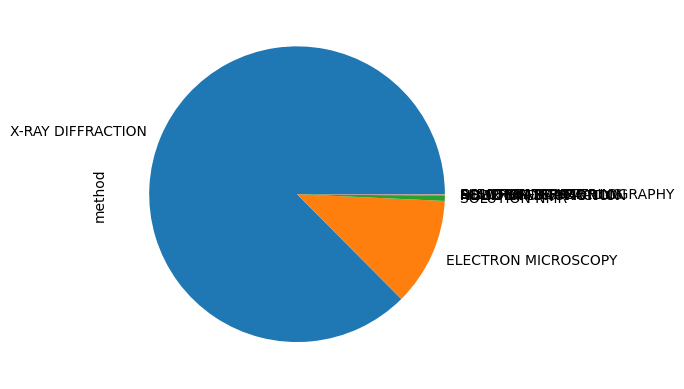

In [6]:
# Method

import pandas as pd

method_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/methods.txt', sep=',', header=None, names=['entry', 'method'])

value_count = method_df['method'].value_counts()

#method_df['method'].value_counts().plot.pie(y='method')